# 清理与分析数据
## 收集

In [2]:
pip install requests


The following command must be run outside of the IPython shell:

    $ pip install requests

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import json
import time
import matplotlib as plt

> 提示：你需要收集的文件有：
1. 收集手头文件 `twitter_archive_enhanced.csv`，其中包含了一些主要的推特信息，是本次清洗的主要数据，其中的评分、地位和名字等数据是从 `text` 原文中提取的，但是提取的并不好，评分并不都是正确的，狗的名字和地位也有不正确的 。**如果你想用评分、地位和名字进行分析和可视化，需要评估和清洗这些列。完成这些列的评估和清洗，你可以学到更加实用的技能。**
2. 编程下载收集互联网文件：`image-predictions.tsv`，其中包含了推特图像预测信息，根据推特中的图片预测出狗狗种类；
3. 查询 API 收集额外推特信息 `tweet_json.txt`，如果你无法访问 Twitter 的话，可以直接读取项目可供下载的 `tweet_json.txt` 文件，从中提取所需数据。至少需要提取转发数（`retweet_count`）和喜欢数（`favorite_count`）这两列，**如果你的分析中不需要用到其他列，则不需要收集其他列**。如果提取了其他列只用于清洗，那么这样的清洗没有意义。

In [4]:
# 收集文件 1 保存为 dataframe
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# 收集文件 2 保存为 dataframe
url2 = 'https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd002/image-predictions.tsv'
response = requests.get(url2)

In [6]:
with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
df2 = pd.read_csv('image_predictions.tsv',sep = '\t', encoding = 'utf8')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# 收集文件 3 保存为 dataframe
tweet = []
with open('tweet_json.txt','r') as file:
    for i in file.readlines():
        dic = json.loads(i)
        tweet.append(dic)

In [8]:
df3 = pd.DataFrame.from_dict(tweet)
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## 评估


 # df1 issues 
-  The `rating_numerator` has outliers, such as value 1776
-  The `name` column has empty values.
-  The `retweeted_status_id` column has empty values.
-  The `retweeted_status_user_id` column has empty values.
-  The `retweeted_status_timestamp` column has empty values.


# df2 issues



# df3 issues
-  The `contributors` column has empty values.
-  The `coordinates` column has empty values.
-  The `entitles` column has dictionaries inside.
-  The `user` column has dictionaries inside.[TIDINESS]
-  The `display_text_range` should be 2 separate columns. [TIDINESS]

### 编程评估
- 通过 df.info(), describe等发现问题

In [9]:
df1.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
df3.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2352.000000,2.352000e+03,7.800000e+01,7.800000e+01,2.900000e+01,2352.000000
mean,8109.198980,7.425913e+17,7.455079e+17,2.014171e+16,8.162686e+17,3134.932398
std,11980.795669,6.846210e+16,7.582492e+16,1.252797e+17,6.164161e+16,5237.846296
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1417.000000,6.783949e+17,6.757419e+17,3.086374e+08,7.888183e+17,618.000000
50%,3596.500000,7.193536e+17,7.038708e+17,4.196984e+09,8.340867e+17,1456.500000
75%,10118.000000,7.991219e+17,8.257804e+17,4.196984e+09,8.664587e+17,3628.750000
max,132318.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,79116.000000


- df1的`rating_numerator`最大数值为1776，数据质量有问题
- df1的`rating_denominator`最大数值为170, 最小为0，数据质量有问题


## df1
-  The `tweet_id` 应该是object类型，不是float类型
-  The `time_stamp` 应该是时间类型

## df2

## df3
- The `created_at` 应该是时间类型


In [11]:
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [12]:
# 使用 pandas 的各种方法评估三个数据集，比如 info value_counts 等
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

 # df1 issues 
-  The `rating_numerator` has outliers, such as value 1776
-  The `name` column has empty values.
-  The `retweeted_status_id` column has empty values.
-  The `retweeted_status_user_id` column has empty values.
-  The `retweeted_status_timestamp` column has empty values.
- df1的`rating_numerator`最大数值为1776，数据质量有问题
- df1的`rating_denominator`最大数值为170, 最小为0，数据质量有问题


# df2 issues



# df3 issues
-  The `contributors` column has empty values.
-  The `coordinates` column has empty values.
-  The `entitles` column has dictionaries inside.
-  The `user` column has dictionaries inside.[TIDINESS]
-  The `display_text_range` should be 2 separate columns. [TIDINESS]
- The `created_at` 应该是时间类型

> 提示：
- 完成目测评估和编程评估之后，总结列出你发现的三个数据集中的所有问题；
- 每个问题都要有对应的一句话或几句话描述；
- 最终至少要包含 8 个质量问题和 2 个整洁度问题。

#### 质量
##### `df1` 表格
--  The `rating_numerator` has outliers, such as value 1776
-  The `name` column has empty values.
-  The `retweeted_status_id` column has empty values.
-  The `retweeted_status_user_id` column has empty values.
-  The `retweeted_status_timestamp` column has empty values.
- `rating_numerator`最大数值为1776，数据质量有问题
- `rating_denominator`最大数值为170, 最小为0，数据质量有问题

##### `df2` 表格


##### `df3表格`
-  The `contributors` column has empty values.
-  The `coordinates` column has empty values.
-  The `entitles` column has dictionaries inside.
-  The `created_at` 应该是时间类型


#### 整洁度
##### `df3表格`
-  The `user` column has dictionaries inside.[TIDINESS]
-  The `display_text_range` should be 2 separate columns. [TIDINESS]



## 清理

> 提示：
- 清理数据集之前需要先备份数据集；
- 按照下面示例的结构：**定义-代码-测试**，对提出的每个问题进行清洗。

In [13]:
# 备份三个数据集到 df1_original,df2_original, df3_original 
df1_original = df1
df2_original = df2
df3_original = df3

In [14]:
sum(df1.tweet_id.duplicated())

0

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### df1的 denominator是否均为10

##### 质量问题 1
##### 定义
- 结果发现，只有23个items 的denominator不是10，我决定将这些行删除。

In [16]:
a = len(df1.rating_denominator)

In [17]:
# 经查，共有23条 denominator 不等于10
rating_abnormal = 0
for i in range(a):
    if df1.rating_denominator[i] != 10:
        rating_abnormal = rating_abnormal +1
rating_abnormal

23

##### 代码

In [18]:
# 删除 denominator 不等于10的 行
for i in range(a):
    if df1.rating_denominator[i] != 10:
        df1 = df1.drop(i)

##### 检验

In [19]:
rating_abnormal = 0
df1_new_length = len(df1)

In [20]:
df1_new_length

2333

In [21]:
df1_new = df1.reset_index(drop = True)

In [22]:
rating_abnormal = 0
df1_new_length = len(df1)
for ii in range(df1_new_length):
    if df1_new['rating_denominator'][ii] != 10:
        rating_abnormal = rating_abnormal + 1
df1 = df1_new

### df1的 rating_numerator

In [23]:
df1.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,    0,   75,    7,    9,    8,    1,   27,    3,    4, 1776,
         26,    2])

In [24]:
k = len(df1)
for i in range(k):
    if df1.rating_numerator[i] > 100:
        print(i,df1.rating_numerator[i])

188 420
189 666
290 182
973 1776
2052 420


##### 只有5个大于100，需要查看一下这5条items的具体情况
- 记录这5个数据的index,在新的df1中，分别[188,189,290,973,2052].
- 查看这5个数据相应的`text`，没有发现异常。

In [25]:
for i in range(k):
    if df1.rating_numerator[i] > 15:
        print(i,df1.rating_numerator[i])

55 17
188 420
189 666
290 182
339 75
691 75
759 27
973 1776
1692 26
2052 420


#####  只有10个数据大于15
- 经查看评分高的狗狗图片，发现狗狗确实很特别。

##### 质量问题 2
- df1的 `name` 有些为None，有些为a, an ,the, such 等等，还有的为'O'

##### 定义
- 把'None'，'a','an','the'等小写字母打头的`name`设为None。
- 找出`name`='O'的行相应的`text`以找到真实的`name`

##### 代码

In [26]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [27]:
df1 = df1.reset_index(drop = True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 17 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          2333 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
df1.name[0][0].islower()

False

In [30]:
name_none = 0
for i in range(2333):
    if df1.name[i] in ['None'] or df1.name[i][0].islower():
        name_none = name_none + 1
        df1.name[i] = None
name_none

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


834

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 17 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          1499 non-null object
doggo                         2333 non-null object
floofer                       2333 non-null object
pupper                        2333 non-null object
puppo                         2333 non-null object
dtypes: float64(4), int64(3), ob

In [32]:
len(df1['name'].unique())

930

In [33]:
df1.text[771]

"This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC"

In [34]:
df1.name[771]="O'Malley"

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### 测试

In [35]:
df1.name[771]

"O'Malley"

In [36]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', None, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody',
       'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Quinn', 'Belle', 'Zooey'

##### 质量问题 3
- doggo, floofer, pupper, puppo 很多值应该为None, 而不是object类型。

##### 定义
- 把doggo, floofer,pupper, puppo本该为空而是object的，改为None

##### 代码

In [37]:
df1.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [38]:
df1.doggo = df1.doggo.apply(lambda x: None if x=='None' else x)

In [39]:
df1.floofer = df1.floofer.apply(lambda x: None if x=='None' else x)

In [40]:
df1.pupper = df1.pupper.apply(lambda x: None if x=='None' else x)

In [41]:
df1.puppo = df1.puppo.apply(lambda x: None if x=='None' else x)

##### 测试

In [42]:
df1.doggo.unique()

array([None, 'doggo'], dtype=object)

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 17 columns):
tweet_id                      2333 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2333 non-null object
source                        2333 non-null object
text                          2333 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2278 non-null object
rating_numerator              2333 non-null int64
rating_denominator            2333 non-null int64
name                          1499 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: float64(4), int64(3), object(10

#### 质量问题4
- df1的timestamp 类型不对

##### 定义
- 把df1的 timestamp 改为 datetime 类型

##### 代码

In [44]:
df1.timestamp = pd.to_datetime(df1.timestamp)

##### 验证

In [45]:
df1.timestamp.unique()

array(['2017-08-01T16:23:56.000000000', '2017-08-01T00:17:27.000000000',
       '2017-07-31T00:18:03.000000000', ...,
       '2015-11-15T23:21:54.000000000', '2015-11-15T23:05:30.000000000',
       '2015-11-15T22:32:08.000000000'], dtype='datetime64[ns]')

### 整洁问题 1
- df2 中 p1,p2,p3中狗的品种写法不同，有的是大写首字母，有的全小写。

##### 定义
- 把所有p1,p2,p3都改为小写

##### 代码

In [46]:
len_df2 = len(df2)

In [47]:
df2.p1 = df2.p1.apply(lambda x: x.lower())

In [48]:
df2.p2 = df2.p2.apply(lambda x: x.lower())

In [49]:
df2.p3 = df2.p3.apply(lambda x: x.lower())

##### 验证

In [50]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### 质量问题 5
- df3的 created_at 数据类型不对

##### 定义
- 把df3的 created_at 数据类型改为 datetime类型

##### 代码

In [51]:
df3.created_at = pd.to_datetime(df3.created_at)

##### 验证

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

### 质量问题 6
- df3的 `lang`类型最好是category类型

##### 定义
- 把 df3的`lang`改为category类型

##### 代码

In [53]:
df3.lang = df3.lang.astype('category')

##### 验证

In [54]:
df3.lang.unique()

[en, und, in, eu, es, nl, tl, ro, et]
Categories (9, object): [en, und, in, eu, ..., nl, tl, ro, et]

### 质量问题 7
- df3 的 `possibly_sensitive`类型不对，应该为bool

##### 定义
- 把 df3的possibly_sensitive改为bool类型

##### 代码

In [55]:
df3.possibly_sensitive = df3.possibly_sensitive.astype('bool')

##### 验证

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

### 质量问题 8
- df3的`possibly_sensitive_appealable`类型不对

##### 定义
- 改为bool类型

##### 代码

In [57]:
df3.possibly_sensitive_appealable = df3.possibly_sensitive_appealable.astype('bool')

##### 验证

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

### 整洁问题 2
- df3中的user id 可以从user中提取出来

##### 定义
- 从user中提取出user_id

##### 代码

In [59]:
for i in range(len(df3)):
    df3['user_id'] = df3.user[i]['id_str']

##### 验证

In [60]:
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user,user_id
0,None,None,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4196983835
1,None,None,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4196983835
2,None,None,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4196983835
3,None,None,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4196983835
4,None,None,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4196983835


### 整洁问题 3
- df1,df2,df3可以进行合并

##### 定义
- 把 df1,df2,df3按照 tweet的id进行合并
- 并删除 转发的 条目，即在df2_is_quote_status 为true的行 需要删除。

##### 代码

In [61]:
df4 = df1[['pupper','puppo','doggo','floofer','tweet_id','timestamp','expanded_urls','rating_numerator','source','text','name']]

In [62]:
df5 = df2

In [63]:
df6 = df3[['id','is_quote_status','favorite_count','retweet_count','possibly_sensitive','possibly_sensitive_appealable','user_id']]

In [64]:
df4 = df4.set_index(['tweet_id'])

In [65]:
df5 = df5.set_index(['tweet_id'])

In [66]:
df6 = df6.set_index(['id'])

In [67]:
df_new = pd.concat([df4,df5,df6],axis =1,join='inner')

In [68]:
df=df_new.reset_index()

In [69]:
df=df.rename(columns={'index':'tweet_id'})

##### 验证

##### 其他数据有效性检查

In [70]:
df.head()

,tweet_id,pupper,puppo,doggo,floofer,timestamp,expanded_urls,rating_numerator,source,text,...,p2_dog,p3,p3_conf,p3_dog,is_quote_status,favorite_count,retweet_count,possibly_sensitive,possibly_sensitive_appealable,user_id
0,892420643555336193,None,None,None,None,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,...,False,banana,0.076110,False,False,39492,8842,False,False,4196983835
1,892177421306343426,None,None,None,None,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,...,True,papillon,0.068957,True,False,33786,6480,False,False,4196983835
2,891815181378084864,None,None,None,None,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,...,True,kelpie,0.031379,True,False,25445,4301,False,False,4196983835
3,891689557279858688,None,None,None,None,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,...,True,spatula,0.040836,False,False,42863,8925,False,False,4196983835
4,891327558926688256,None,None,None,None,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,...,True,german_short-haired_pointer,0.175219,True,False,41016,9721,False,False,4196983835


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 28 columns):
tweet_id                         2055 non-null int64
pupper                           222 non-null object
puppo                            24 non-null object
doggo                            80 non-null object
floofer                          8 non-null object
timestamp                        2055 non-null datetime64[ns]
expanded_urls                    2055 non-null object
rating_numerator                 2055 non-null int64
source                           2055 non-null object
text                             2055 non-null object
name                             1393 non-null object
jpg_url                          2055 non-null object
img_num                          2055 non-null int64
p1                               2055 non-null object
p1_conf                          2055 non-null float64
p1_dog                           2055 non-null bool
p2                               

In [72]:
# 检查是否有错误数据,p1,p2,p3 分别检查
for i in range(len_df2):
    if df2.p3_conf[i]>1 or df2.p3_conf[i]<0:
        print(i,df2.p3_conf[i])

### 存储清理后的主数据集

In [73]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df.to_csv("df_dog.csv")

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


### 问题1. 分析是否有name的狗的评分更高

In [74]:
# 找出 有name的编号，储存到 list_name里；
# 找出 没有name的编号，储存到 list_noname 里。
list_noname = []
list_name = []
for i in range(len(df)):
    if df.name.isnull().values[i] == True:
        list_noname.append(i)
    else:
        list_name.append(i)

In [75]:
pd.set_option('max_columns',100)

In [76]:
len(list_noname)

662

In [77]:
len(list_name)

1393

- noname共有662个，
- name 共有1393个。

In [78]:
list_noname_rating = []
for i in range(len(list_noname)):
    temp1 = list_noname[i]
    temp2 = df['rating_numerator'][temp1]
    list_noname_rating.append(temp2)

In [79]:
list_name_rating = []
for i in range(len(list_name)):
    temp1 = list_name[i]
    temp2 = df['rating_numerator'][temp1]
    list_name_rating.append(temp2)

In [80]:
from scipy import stats

##### 计算noname, 和 name的 rating_numerator 的mean, std, min, max,argmin, argmax

In [81]:
list_temp = list_name_rating

In [82]:
mean_std_min_max1=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]

In [83]:
mean_std_min_max1

[12.069633883704235, 47.349900717947477, 2, 1776]

In [84]:
list_temp = list_noname_rating

In [85]:
mean_std_min_max2=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]

In [86]:
mean_std_min_max2

[10.938066465256798, 16.136991933075706, 0, 420]

In [87]:
stats.ttest_ind(list_name_rating,list_noname_rating,equal_var = False)

Ttest_indResult(statistic=0.7992216251187696, pvalue=0.42426103202950971)

统计学上，name和 noname不存在差异。

鉴于，评分分子 大于15的条目很少，而一些很大的值对整个计算结果带来了偏差。因此下面只考虑分子小于15的评分。

In [88]:
list_noname_rating2 = []
for i in range(len(list_noname_rating)):
    if list_noname_rating[i] <= 15:
        list_noname_rating2.append(list_noname_rating[i])

In [89]:
list_name_rating2 = []
for i in range(len(list_name_rating)):
    if list_name_rating[i] <= 15:
        list_name_rating2.append(list_name_rating[i])

重新进行 mean,std,min,max的计算

In [90]:
list_temp = list_name_rating2

In [91]:
mean_std_min_max12=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]

In [92]:
mean_std_min_max12

[10.744604316546763, 1.9061306870077379, 2, 14]

In [93]:
list_temp = list_noname_rating2

In [94]:
mean_std_min_max22=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]

In [95]:
mean_std_min_max22

[10.295454545454545, 2.6271849099300546, 0, 15]

In [96]:
stats.ttest_ind(list_name_rating2,list_noname_rating2,equal_var = False)

Ttest_indResult(statistic=3.9258301209754842, pvalue=9.2354395331502496e-05)

Ttest的 p value <0.001,我们认为 name的 rating 要大于 noname的rating

### 结论1：排除outliers后，发现有name的狗狗评分 大于 没有name的狗狗评分

### 问题2：分析狗狗的 哪种status评分更高
- 由于 pupper, puppo, doggo, floofer 分别有 222,24,80,8 个items, 对于puppo, doggo, floofer 可以把数据都列出观察

In [97]:
pupper_list=[]
for i in range(len(df)):
    if df.pupper[i]:
        pupper_list.append(df.rating_numerator[i])

In [98]:
puppo_list=[]
for i in range(len(df)):
    if df.puppo[i]:
        puppo_list.append(df.rating_numerator[i])

In [99]:
doggo_list=[]
for i in range(len(df)):
    if df.doggo[i]:
        doggo_list.append(df.rating_numerator[i])

In [100]:
floofer_list=[]
for i in range(len(df)):
    if df.floofer[i]:
        floofer_list.append(df.rating_numerator[i])

In [101]:
list_temp = pupper_list
mean_std_min_max_pupper=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = puppo_list
mean_std_min_max_puppo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = doggo_list
mean_std_min_max_doggo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = floofer_list
mean_std_min_max_floofer=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
[mean_std_min_max_pupper,mean_std_min_max_puppo,mean_std_min_max_doggo,mean_std_min_max_floofer]

[[10.77927927927928, 2.0601153259556413, 3, 27],
 [12.041666666666666, 1.240939384319619, 9, 14],
 [11.862500000000001, 1.5791116964926832, 5, 14],
 [11.875, 1.0532687216470449, 10, 13]]

In [102]:
floofer_list

[13, 11, 12, 13, 12, 13, 10, 11]

In [103]:
temp1,temp2 = pupper_list,puppo_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_list,floofer_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_list,doggo_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_list,floofer_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_list,doggo_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = doggo_list,floofer_list
print(stats.ttest_ind(temp1,temp2,equal_var = False))

Ttest_indResult(statistic=-4.3007697979844837, pvalue=0.00011562543427274383)
Ttest_indResult(statistic=-2.5994001724391063, pvalue=0.029297539394663664)
Ttest_indResult(statistic=-4.80750847898367, pvalue=3.2077419722681211e-06)
Ttest_indResult(statistic=0.35102452174533988, pvalue=0.73101372773871087)
Ttest_indResult(statistic=0.57082037169548383, pvalue=0.57085397032660434)
Ttest_indResult(statistic=-0.028673449116903459, pvalue=0.97768750087474365)


In [104]:
print(mean_std_min_max_pupper)
print(mean_std_min_max_puppo)

[10.77927927927928, 2.0601153259556413, 3, 27]
[12.041666666666666, 1.240939384319619, 9, 14]


##### 问题2结论
- 从ttest结果来看， pupper 和 puppo 的评分有显著性差异，pupper的分数低于puppo
- 只看均值，puppo状态的分数最高

##### 问题3: favorite 和 Retweet 哪种狗狗状态的多

In [105]:
temp1 = []
temp2 = []
for i in range(len(df)):
    if df.pupper[i]:
        temp1.append(df.favorite_count[i])
        temp2.append(df.retweet_count[i])
pupper_favorite = temp1
pupper_retweet = temp2

temp1 = []
temp2 = []
for i in range(len(df)):
    if df.puppo[i]:
        temp1.append(df.favorite_count[i])
        temp2.append(df.retweet_count[i])
puppo_favorite = temp1
puppo_retweet = temp2

temp1 = []
temp2 = []
for i in range(len(df)):
    if df.doggo[i]:
        temp1.append(df.favorite_count[i])
        temp2.append(df.retweet_count[i])
doggo_favorite = temp1
doggo_retweet = temp2

temp1 = []
temp2 = []
for i in range(len(df)):
    if df.floofer[i]:
        temp1.append(df.favorite_count[i])
        temp2.append(df.retweet_count[i])
floofer_favorite = temp1
floofer_retweet = temp2


In [106]:
list_temp = pupper_favorite
mean_std_min_max_pupper=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = puppo_favorite
mean_std_min_max_puppo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = doggo_favorite
mean_std_min_max_doggo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = floofer_favorite
mean_std_min_max_floofer=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
[mean_std_min_max_pupper,mean_std_min_max_puppo,mean_std_min_max_doggo,mean_std_min_max_floofer]

[[7068.1171171171172, 10617.315419870614, 0, 106481],
 [21700.166666666668, 27028.140419857886, 0, 132318],
 [17400.799999999999, 20830.070273765279, 0, 130533],
 [13652.25, 9803.663393726858, 2255, 33209]]

In [107]:
list_temp = pupper_retweet
mean_std_min_max_pupper=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = puppo_retweet
mean_std_min_max_puppo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = doggo_retweet
mean_std_min_max_doggo=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
list_temp = floofer_retweet
mean_std_min_max_floofer=[np.mean(list_temp),np.std(list_temp),np.min(list_temp),np.max(list_temp)]
[mean_std_min_max_pupper,mean_std_min_max_puppo,mean_std_min_max_doggo,mean_std_min_max_floofer]

[[2583.801801801802, 3852.3492360367786, 82, 32705],
 [6923.0, 9909.4734681852133, 707, 47958],
 [7584.9875000000002, 12332.92620132561, 718, 79116],
 [4745.5, 5315.3066233285172, 494, 18343]]

In [108]:
temp1,temp2 = pupper_favorite,puppo_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_favorite,floofer_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_favorite,doggo_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_favorite,floofer_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_favorite,doggo_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = doggo_favorite,floofer_favorite
print(stats.ttest_ind(temp1,temp2,equal_var = False))

Ttest_indResult(statistic=-2.5756885009475177, pvalue=0.016667593328511851)
Ttest_indResult(statistic=-1.7447710119304134, pvalue=0.12152662688794623)
Ttest_indResult(statistic=-4.2174636408553452, pvalue=5.6812270244030561e-05)
Ttest_indResult(statistic=1.1932072533572344, pvalue=0.24238244702467776)
Ttest_indResult(statistic=0.70439732409777667, pvalue=0.48638232394644521)
Ttest_indResult(statistic=0.85498340207604362, pvalue=0.4074472456297511)


- ttest结果看出，puppo的 favorite 显著大于 pupper的 favorite

In [109]:
temp1,temp2 = pupper_retweet,puppo_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_retweet,floofer_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = pupper_retweet,doggo_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_retweet,floofer_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = puppo_retweet,doggo_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))
temp1,temp2 = doggo_retweet,floofer_retweet
print(stats.ttest_ind(temp1,temp2,equal_var = False))

Ttest_indResult(statistic=-2.0836943758867221, pvalue=0.048134865407796282)
Ttest_indResult(statistic=-1.0671675089577393, pvalue=0.32020703351806906)
Ttest_indResult(statistic=-3.5430377344657566, pvalue=0.00064677912143014079)
Ttest_indResult(statistic=0.75556948982200156, pvalue=0.45788108895012303)
Ttest_indResult(statistic=-0.265972274084469, pvalue=0.79145647754029391)
Ttest_indResult(statistic=1.1629628956451805, pvalue=0.26304893254071665)


- ttest结果看出，doggo 的 retweet 显著大于 pupper的 retweet

#### 问题4： 分析转发与点赞数与tweet时间的相关性

In [110]:
# 提取所有 tweet 的 星期几:1-7，月份:1-12，发布时间Hour :0-23
isoweekday_tweet = []
month_tweet = []
hour_tweet = []
for i in range(len(df)):
    month_tweet.append(df.timestamp[i].month)
    isoweekday_tweet.append(df.timestamp[i].isoweekday())
    hour_tweet.append(df.timestamp[i].hour)

In [111]:
# 把 RETWEET 数 按照时间进行分类
isoweekday_retweet = {}
month_retweet = {}
hour_retweet = {}
for i in range(len(df)):
    try:
        isoweekday_retweet[isoweekday_tweet[i]] = isoweekday_retweet[isoweekday_tweet[i]] +[df.retweet_count[i]]
        month_retweet[month_tweet[i]] = month_retweet[month_tweet[i]] + [df.retweet_count[i]]
        hour_retweet[hour_tweet[i]] = hour_retweet[hour_tweet[i]] + [df.retweet_count[i]]
    except KeyError:                                           
        isoweekday_retweet[isoweekday_tweet[i]] = [df.retweet_count[i]]
        month_retweet[month_tweet[i]] = [df.retweet_count[i]]
        hour_retweet[hour_tweet[i]] = [df.retweet_count[i]]

In [112]:
# 把 favorite 数 按照时间进行分类
isoweekday_favorite = {}
month_favorite = {}
hour_favorite = {}
for i in range(len(df)):
    try:
        isoweekday_favorite[isoweekday_tweet[i]] = isoweekday_favorite[isoweekday_tweet[i]] +[df.favorite_count[i]]
        month_favorite[month_tweet[i]] = month_favorite[month_tweet[i]] + [df.favorite_count[i]]
        hour_favorite[hour_tweet[i]] = hour_favorite[hour_tweet[i]] + [df.favorite_count[i]]
    except KeyError:                                           
        isoweekday_favorite[isoweekday_tweet[i]] = [df.favorite_count[i]]
        month_favorite[month_tweet[i]] = [df.favorite_count[i]]
        hour_favorite[hour_tweet[i]] = [df.favorite_count[i]]

#### 画图分析 tweet 的 [星期几，月份 ， hour]  与  [favorite, retweet] 的相关性

- 分析 favorite 和时间的关系

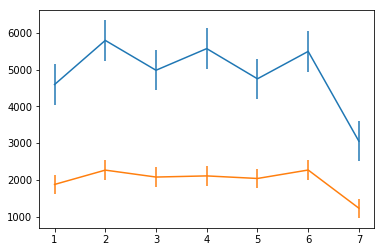

In [114]:
import matplotlib.pyplot as plt
y = []
y_std = []
temp = isoweekday_favorite
temp_len = len(temp)
x = list(range(temp_len))
x = list(map(lambda x:x+1,x))
for i in range(temp_len):
    y.append(np.mean(temp[i+1]))
    y_std = np.std(temp[i+1])/(len(temp[i+1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)
y = []
y_std = []
temp = isoweekday_retweet
temp_len = len(temp)
x = list(range(temp_len))
x = list(map(lambda x:x+1,x))
for i in range(temp_len):
    y.append(np.mean(temp[i+1]))
    y_std = np.std(temp[i+1])/(len(temp[i+1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)
plt.show()

<Container object of 3 artists>

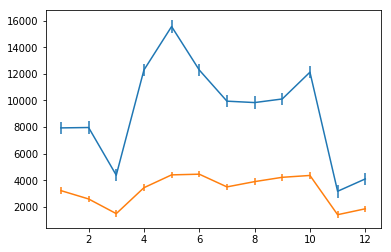

In [115]:
# 分析月份
y = []
y_std = []
temp = month_favorite
temp_len = len(temp)
x = list(range(temp_len))
x = list(map(lambda x:x+1,x))
for i in range(temp_len):
    y.append(np.mean(temp[i+1]))
    y_std = np.std(temp[i+1])/(len(temp[i+1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)
y = []
y_std = []
temp = month_retweet
temp_len = len(temp)
x = list(range(temp_len))
x = list(map(lambda x:x+1,x))
for i in range(temp_len):
    y.append(np.mean(temp[i+1]))
    y_std = np.std(temp[i+1])/(len(temp[i+1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)

<Container object of 3 artists>

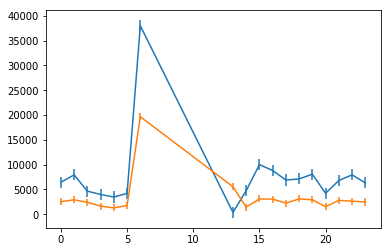

In [116]:
y = []
y_std = []
temp = sorted(hour_favorite.items())
temp_len = len(temp)
x = []
for i in range(temp_len):
    x.append(temp[i][0])
    y.append(np.mean(temp[i][1]))
    y_std = np.std(temp[i][1])/(len(temp[i][1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)

y = []
y_std = []
temp = sorted(hour_retweet.items())
temp_len = len(temp)
x = []
for i in range(temp_len):
    x.append(temp[i][0])
    y.append(np.mean(temp[i][1]))
    y_std = np.std(temp[i][1])/(len(temp[i][1])**0.5) 
fig = plt.gca()
plt.errorbar(x,y,y_std)

In [117]:
df.head()

,tweet_id,pupper,puppo,doggo,floofer,timestamp,expanded_urls,rating_numerator,source,text,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_quote_status,favorite_count,retweet_count,possibly_sensitive,possibly_sensitive_appealable,user_id
0,892420643555336193,None,None,None,None,2017-08-01 16:23:56,https://twitter.com/dog_rates/status/892420643...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,False,39492,8842,False,False,4196983835
1,892177421306343426,None,None,None,None,2017-08-01 00:17:27,https://twitter.com/dog_rates/status/892177421...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,False,33786,6480,False,False,4196983835
2,891815181378084864,None,None,None,None,2017-07-31 00:18:03,https://twitter.com/dog_rates/status/891815181...,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,False,25445,4301,False,False,4196983835
3,891689557279858688,None,None,None,None,2017-07-30 15:58:51,https://twitter.com/dog_rates/status/891689557...,13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,False,42863,8925,False,False,4196983835
4,891327558926688256,None,None,None,None,2017-07-29 16:00:24,https://twitter.com/dog_rates/status/891327558...,12,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,False,41016,9721,False,False,4196983835
